## 배수 구하기, 입력: 1개, 출력: 1개
- 배수의 규칙을 학습시키고 어떤수를 전달하여 배수를 구하게 할 것임.
- 수를 모르는 AI는 수의 배수의 규칙을 알아낸 후 수를 예측하게됨
- 인간의 학습 경로: 숫자 학습 -> 사칙연산 학습

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class
# from keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.2~
# from tensorflow.keras.models import Sequential  # class
# from tensorflow.keras.models import load_model  # model 파일 로딩
# from tensorflow.keras.layers import Dense       # 전결합층
# from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [2]:
print([i for i in range(1, 21)])
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수
y_train = np.array([i*2 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


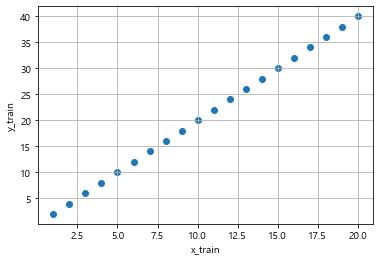

In [3]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [4]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 1: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(1, input_dim=1, activation='linear'))
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


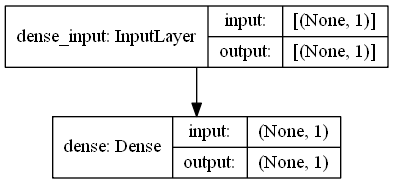

In [5]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [6]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 1s 49ms/step - loss: 836.9327 - val_loss: 3627.4800
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 814.5900 - val_loss: 3598.0027
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 857.4158 - val_loss: 3569.6846
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 1071.7167 - val_loss: 3539.7100
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 822.9322 - val_loss: 3513.0608
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 802.0903 - val_loss: 3485.3645
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 864.1712 - val_loss: 3457.1719
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 1140.3292 - val_loss: 3428.1982
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 972.1947 - val_loss: 3400.7947
Epoch 10/300
16/16 [==============================] - 0s 4ms/

16/16 [==============================] - 0s 4ms/step - loss: 446.8549 - val_loss: 1851.3022
Epoch 80/300
16/16 [==============================] - ETA: 0s - loss: 414.751 - 0s 3ms/step - loss: 555.5502 - val_loss: 1832.4377
Epoch 81/300
16/16 [==============================] - 0s 4ms/step - loss: 394.4939 - val_loss: 1816.6101
Epoch 82/300
16/16 [==============================] - 0s 4ms/step - loss: 386.4952 - val_loss: 1799.6794
Epoch 83/300
16/16 [==============================] - 0s 4ms/step - loss: 519.6040 - val_loss: 1780.9412
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 668.3393 - val_loss: 1762.8103
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 451.8268 - val_loss: 1747.6625
Epoch 86/300
16/16 [==============================] - 0s 4ms/step - loss: 409.0978 - val_loss: 1731.2803
Epoch 87/300
16/16 [==============================] - 0s 4ms/step - loss: 565.6263 - val_loss: 1713.2080
Epoch 88/300
16/16 [======================

16/16 [==============================] - 0s 3ms/step - loss: 181.7206 - val_loss: 815.9698
Epoch 157/300
16/16 [==============================] - 0s 4ms/step - loss: 161.9098 - val_loss: 806.9257
Epoch 158/300
16/16 [==============================] - 0s 4ms/step - loss: 213.2243 - val_loss: 796.4141
Epoch 159/300
16/16 [==============================] - 0s 4ms/step - loss: 246.4233 - val_loss: 786.2605
Epoch 160/300
16/16 [==============================] - 0s 4ms/step - loss: 138.1559 - val_loss: 777.7976
Epoch 161/300
16/16 [==============================] - 0s 4ms/step - loss: 189.8147 - val_loss: 768.1271
Epoch 162/300
16/16 [==============================] - 0s 3ms/step - loss: 204.6118 - val_loss: 758.0560
Epoch 163/300
16/16 [==============================] - 0s 3ms/step - loss: 187.6534 - val_loss: 749.0963
Epoch 164/300
16/16 [==============================] - 0s 4ms/step - loss: 202.7601 - val_loss: 739.9572
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - 

16/16 [==============================] - 0s 4ms/step - loss: 62.8568 - val_loss: 274.4741
Epoch 235/300
16/16 [==============================] - 0s 4ms/step - loss: 80.6272 - val_loss: 269.6906
Epoch 236/300
16/16 [==============================] - 0s 4ms/step - loss: 47.1362 - val_loss: 265.9595
Epoch 237/300
16/16 [==============================] - 0s 3ms/step - loss: 64.1280 - val_loss: 261.3555
Epoch 238/300
16/16 [==============================] - 0s 4ms/step - loss: 67.7284 - val_loss: 257.1249
Epoch 239/300
16/16 [==============================] - 0s 4ms/step - loss: 49.2886 - val_loss: 252.8820
Epoch 240/300
16/16 [==============================] - 0s 3ms/step - loss: 64.5087 - val_loss: 248.6780
Epoch 241/300
16/16 [==============================] - 0s 4ms/step - loss: 47.8951 - val_loss: 244.6541
Epoch 242/300
16/16 [==============================] - 0s 4ms/step - loss: 43.4995 - val_loss: 240.5892
Epoch 243/300
16/16 [==============================] - 0s 3ms/step - loss: 46.

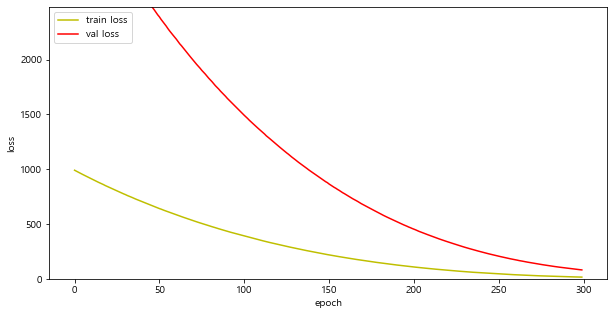

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2481.1538]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [8]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55 ])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[72.05526 ]
 [73.410446]
 [74.76563 ]
 [76.12081 ]
 [77.476   ]]


In [9]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 72.0552597046, 정제된값: 72
x: 52, 실제값: 104, 예측값: 73.4104461670, 정제된값: 73
x: 53, 실제값: 106, 예측값: 74.7656326294, 정제된값: 75
x: 54, 실제값: 108, 예측값: 76.1208114624, 정제된값: 76
x: 55, 실제값: 110, 예측값: 77.4759979248, 정제된값: 77


### 학습이 이루어지고는 있으나 노드가 1개라서 학습 능력이 매우 떨어짐(과소 적합).

In [16]:
# model 제작
try:
    if model != None:
        print('model 객체 삭제')
        del model
except:
    pass

model = Sequential() # 객체 생성
# Dense: 전결합층, 10: 출력노드(뉴런), input_dim=1: 입력 데이터 종류 수
# activation='linear': 선형회귀
model.add(Dense(10, input_dim=1, activation='linear'))
model.add(Dense(1, activation='linear'))
# optimizer='adam': 오차 역전파(weight(기울기), bias(편향) update)차
# loss='mse': 손실 측정 함수
model.compile(optimizer='adam', loss='mse')
model.summary() # 네트워크 확인


model 객체 삭제
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


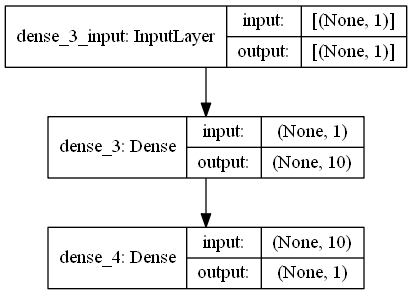

In [17]:
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화
plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

In [18]:
# 훈련
# x_train: 독립 변수 -> y_train: 종속 변수, 찾아야 할 값, target, yhat
# validation_split=0.2: 훈련데이터에서 20% 분리하여 훈련시 검증 데이터로 사용
# shuffle=True: 데이터를 무작위로 추출되도록 섞는 역활을 함
# epochs=300: 전체 데이터를 300번 학습을 진행하는 설정
# batch_size=1: 데이터 1건을 읽어서 가중치와 편향을 변경한다.
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=300, batch_size=1)

Epoch 1/300
16/16 [==============================] - 0s 11ms/step - loss: 241.0693 - val_loss: 819.7084
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 255.5020 - val_loss: 742.2878
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 137.4477 - val_loss: 680.1660
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 229.4898 - val_loss: 603.8939
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 104.9098 - val_loss: 546.0045
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 153.0560 - val_loss: 482.8284
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 83.9906 - val_loss: 428.6387
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 131.8024 - val_loss: 369.6623
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 71.4259 - val_loss: 326.6885
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 

16/16 [==============================] - 0s 4ms/step - loss: 0.1836 - val_loss: 0.4034
Epoch 83/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2644 - val_loss: 0.4297
Epoch 84/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1340 - val_loss: 0.4218
Epoch 85/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1922 - val_loss: 0.3996
Epoch 86/300
16/16 [==============================] - 0s 3ms/step - loss: 0.1719 - val_loss: 0.4099
Epoch 87/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1466 - val_loss: 0.4105
Epoch 88/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2112 - val_loss: 0.4268
Epoch 89/300
16/16 [==============================] - 0s 4ms/step - loss: 0.2082 - val_loss: 0.3945
Epoch 90/300
16/16 [==============================] - 0s 4ms/step - loss: 0.1798 - val_loss: 0.3774
Epoch 91/300
16/16 [==============================] - 0s 5ms/step - loss: 0.1882 - val_loss: 0.3762
Epoch 92/300


16/16 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.0756
Epoch 164/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.0890
Epoch 165/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0545 - val_loss: 0.0723
Epoch 166/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.0718
Epoch 167/300
16/16 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0752
Epoch 168/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.0682
Epoch 169/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0340 - val_loss: 0.0722
Epoch 170/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0324 - val_loss: 0.0566
Epoch 171/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.0644
Epoch 172/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.0649
Epoc

16/16 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 245/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 246/300
16/16 [==============================] - 0s 4ms/step - loss: 9.4067e-04 - val_loss: 0.0022
Epoch 247/300
16/16 [==============================] - 0s 3ms/step - loss: 9.0712e-04 - val_loss: 0.0026
Epoch 248/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 249/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 250/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 251/300
16/16 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 252/300
16/16 [==============================] - 0s 4ms/step - loss: 8.4950e-04 - val_loss: 0.0017
Epoch 253/300
16/16 [==============================] - 0s 4ms/step - loss: 9.0987e-04 - val_l

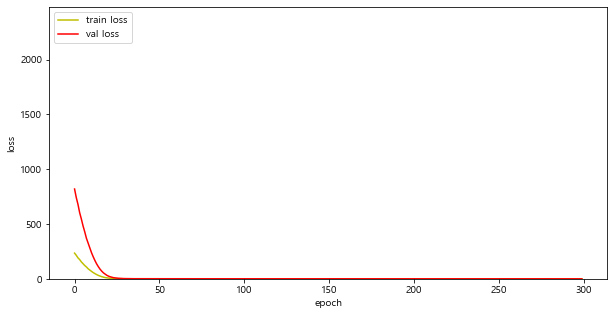

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2481.1538]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [20]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)
y = x * 2  # 비교 목적
print('찾아야할 값:', y)
p = model.predict(x) # 모델 사용
print(type(p))
print(p.shape)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[101.96597 ]
 [103.96512 ]
 [105.96428 ]
 [107.96343 ]
 [109.962585]]


In [21]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 101.9659729004, 정제된값: 102
x: 52, 실제값: 104, 예측값: 103.9651184082, 정제된값: 104
x: 53, 실제값: 106, 예측값: 105.9642791748, 정제된값: 106
x: 54, 실제값: 108, 예측값: 107.9634323120, 정제된값: 108
x: 55, 실제값: 110, 예측값: 109.9625854492, 정제된값: 110


### AI는 배수의 규칙을 학습 완료함.

In [22]:
# 사용자로부터 수를 입력받아 배수를 알려주는 AI 모델
src = int(input('배수를 구할 수를 입력하세요:'))
x = np.array([src])
y = x * 2 # 실제답, 비교 목적
p = model.predict(x) # 모델 사용, 2차원 배열로 예측 결과 발생
print(p)
fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
print(fmt.format(x[0], y, p[0][0], p[0][0]))

배수를 구할 수를 입력하세요:50
[[99.96682]]
x: 50, 실제값: [100], 예측값: 99.9668197632, 정제된값: 100
